**Xây dựng mô hình Machine Learning để dự đoán xác suất khách hàng rơi vào nợ xấu dựa trên dữ liệu lịch sử tín dụng, tài chính và hành vi thanh toán.**

Mục tiêu chính:
*  Phát hiện sớm khách hàng có nguy cơ nợ xấu.

**import các thư viện cần thiết**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Thư viện xử lý dữ liệu phân loại
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành train và test
from sklearn.preprocessing import StandardScaler  # Chuẩn hóa dữ liệu
from sklearn.preprocessing import LabelEncoder  # Chuyển đổi giá trị phân loại thành số

# Thư viện xây dựng các mô hình Machine Learning
from sklearn.linear_model import LogisticRegression  # Mô hình Logistic Regression
from sklearn.ensemble import RandomForestClassifier  # Mô hình Random Forest
from xgboost import XGBClassifier  # Mô hình XGBoost

# Thư viện đánh giá mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Đánh giá độ chính xác
from sklearn.model_selection import cross_val_score  # Cross-validation

# Thư viện để xử lý các cảnh báo
import warnings
warnings.filterwarnings("ignore")  # Tắt cảnh báo

**1.	Làm sạch và chuẩn hóa dữ liệu.**

In [3]:
data = pd.read_csv('/content/Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
# Kiểm tra thông tin tổng quan của dữ liệu
data.info(),data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

(None,
        LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
 0  I38PQUQS96   56   85994       50587          520              80   
 1  HPSK72WA7R   69   50432      124440          458              15   
 2  C1OZ6DPJ8Y   46   84208      129188          451              26   
 3  V2KKSFM3UN   32   31713       44799          743               0   
 4  EY08JDHTZP   60   20437        9139          633               8   
 
    NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
 0               4         15.23        36      0.44   Bachelor's   
 1               1          4.81        60      0.68     Master's   
 2               3         21.17        24      0.31     Master's   
 3               3          7.07        24      0.23  High School   
 4               4          6.51        48      0.73   Bachelor's   
 
   EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
 0      Full-time      Divorced         Yes           Yes       Other 

In [8]:
# Kiểm tra và chuẩn hóa dữ liệu phân loại
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data1[col])
data.drop(columns=['LoanID'], inplace=True)

In [9]:
data.info(),data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  int64  
 10  EmploymentType  255347 non-null  int64  
 11  MaritalStatus   255347 non-null  int64  
 12  HasMortgage     255347 non-null  int64  
 13  HasDependents   255347 non-null  int64  
 14  LoanPurpose     255347 non-null  int64  
 15  HasCoSigner     255347 non-null  int64  
 16  Default         255347 non-null  int64  
dtypes: float64

(None,
    Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
 0   56   85994       50587          520              80               4   
 1   69   50432      124440          458              15               1   
 2   46   84208      129188          451              26               3   
 3   32   31713       44799          743               0               3   
 4   60   20437        9139          633               8               4   
 
    InterestRate  LoanTerm  DTIRatio  Education  EmploymentType  MaritalStatus  \
 0         15.23        36      0.44          0               0              0   
 1          4.81        60      0.68          2               0              1   
 2         21.17        24      0.31          2               3              0   
 3          7.07        24      0.23          1               0              1   
 4          6.51        48      0.73          0               3              0   
 
    HasMortgage  HasDependents  LoanPurpo

**2. Phân tích dữ liệu (EDA) để khám phá mối quan hệ giữa các biến và nợ xấu.**

In [11]:
corr = data.corrwith(data['Default'])
corr.sort_values(ascending=False)

,0
Default,1.000000
InterestRate,0.131273
LoanAmount,0.086659
EmploymentType,0.041010
NumCreditLines,0.028330
DTIRatio,0.019236
LoanTerm,0.000545
MaritalStatus,-0.007902
LoanPurpose,-0.010096
Education,-0.022835


<Axes: >

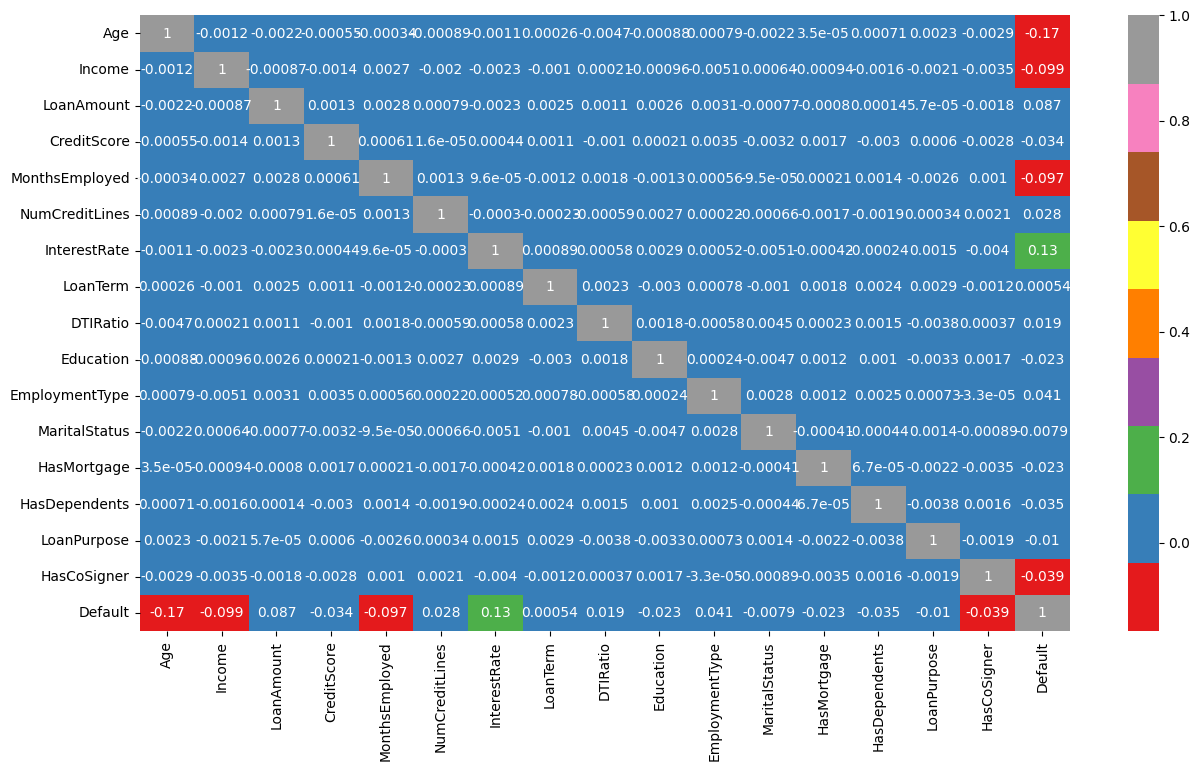

In [17]:
corr2 = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr2, annot=True, cmap='Set1')

**3. Xây dựng mô hình Machine Learning (Logistic Regression, Random Forest, XGBoost)**

In [24]:
# Tách dữ liệu thành biến đầu vào (X) và biến mục tiêu (y)
X = data.drop(columns=['Default'])
y = data['Default']

# Chia tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy,classification_rep,conf_matrix

(0.8859343384896547,
 '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     67681\n           1       0.64      0.05      0.09      8924\n\n    accuracy                           0.89     76605\n   macro avg       0.77      0.52      0.51     76605\nweighted avg       0.86      0.89      0.84     76605\n',
 array([[67452,   229],
        [ 8509,   415]]))

**4.Đánh giá hiệu suất mô hình**

Kết Quả Mô Hình Dự Đoán Nợ Xấu (Random Forest):
Độ chính xác (Accuracy): 88.6%

Báo cáo chi tiết (Classification Report):

Precision (Độ chính xác khi dự đoán nợ xấu): 64%
Recall (Khả năng phát hiện nợ xấu): 5% (Khá thấp)
F1-Score cho nợ xấu: 9%

**Đánh Giá:**
Mô hình có độ chính xác tổng thể tốt (89%), nhưng khả năng phát hiện nợ xấu (Recall) còn kém (chỉ 5%).
Có thể do dữ liệu mất cân bằng (nhiều nợ tốt hơn nợ xấu).

In [26]:
from imblearn.over_sampling import SMOTE

# Xử lý mất cân bằng bằng SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Huấn luyện lại mô hình với dữ liệu đã xử lý
model_smote = RandomForestClassifier(n_estimators=100, random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Dự đoán và đánh giá lại
y_pred_smote = model_smote.predict(X_test)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)

accuracy_smote, classification_rep_smote, conf_matrix_smote


(0.8311859539194569,
 '              precision    recall  f1-score   support\n\n           0       0.90      0.91      0.91     67681\n           1       0.25      0.23      0.24      8924\n\n    accuracy                           0.83     76605\n   macro avg       0.58      0.57      0.57     76605\nweighted avg       0.82      0.83      0.83     76605\n',
 array([[61643,  6038],
        [ 6894,  2030]]))

In [27]:
#Thử nghiệm mô hình Logistic Regression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     67681\n           1       0.64      0.05      0.09      8924\n\n    accuracy                           0.89     76605\n   macro avg       0.77      0.52      0.51     76605\nweighted avg       0.86      0.89      0.84     76605\n'

In [32]:
#Thử nghiệm mô hình XGBoost
model3 = XGBClassifier()
model3.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred3 = model3.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred3)
classification_rep3 = classification_report(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)

accuracy3, classification_rep3, conf_matrix3

(0.8851772077540631,
 '              precision    recall  f1-score   support\n\n           0       0.89      0.99      0.94     67681\n           1       0.55      0.08      0.15      8924\n\n    accuracy                           0.89     76605\n   macro avg       0.72      0.54      0.54     76605\nweighted avg       0.85      0.89      0.85     76605\n',
 array([[67062,   619],
        [ 8177,   747]]))